# Coronary Heart Disease


A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- *sbp*	-	systolic blood pressure
- *tobacco*	-	cumulative tobacco (kg)
- *ldl*	-	low densiity lipoprotein cholesterol
- *adiposity* - https://en.m.wikipedia.org/wiki/Body_adiposity_index
- *famhist*	-	family history of heart disease (Present, Absent)
- *typea*	-	type-A behavior
- *obesity* - https://en.wikipedia.org/wiki/Obesity
- *alcohol*	-	current alcohol consumption
- *age*	-	age at onset
- *chd*	-	response, coronary heart disease

The dataset is taken from 

http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data

Description is available at

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt

### Step 1: Loading the dataset

- Load the data file SAheart.data. This is csv file.

In [1]:
import pandas as pd

In [2]:
heart_df=pd.read_csv('C:/Users/Meenakshi/Desktop/Machine Learning IIMB/data/SAheart.data')

### Step 2: Finding Metadata 

- Find how many rows and columns available in the dataset.
- Find the columns types of the dataset.

In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


### Step 3: Print Records

- Print first 5 records of the dataset
- Print last 5 records of the dataset
- Print records with index ranging from 10 to 20 with columns "sbp", "ldl" and "chd".

In [4]:
heart_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
heart_df.tail(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,459,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [6]:
heart_df[['sbp', 'ldl','chd']][10:20]

,sbp,ldl,chd
10,206,2.95,1
11,134,4.44,1
12,118,1.88,0
13,132,1.87,0
14,112,2.29,0
15,117,2.44,0
16,120,15.33,0
17,146,8.29,1
18,158,7.46,1
19,124,6.23,1


### Step 4: How many persons have *chd* and *no chd* in the dataset?

- Normalize the results with respect to total number of records in the dataset

In [13]:
heart_df['chd'].value_counts(normalize = True)*100

0    65.367965
1    34.632035
Name: chd, dtype: float64

### Step 5: Does *famhist* have any impact on *chd*?

https://seaborn.pydata.org/generated/seaborn.catplot.html

Note: Draw a catplot. Refer to the link below. Set the values as below.

- x = 'famhist'
- kind = 'count'
- hue = 'chd'


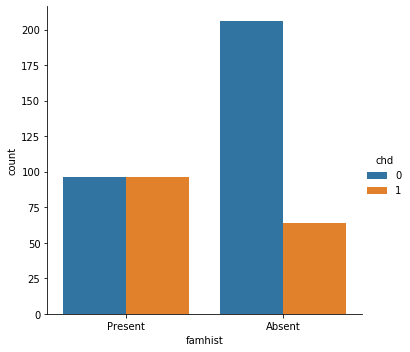

In [12]:
import seaborn as sn
sn.catplot(data=heart_df, 
           x='famhist', 
           hue='chd',
           kind='count');

### Step 6: Is there any difference in alcohol consumption pattern between persons having *chd* and persons having *no chd*?

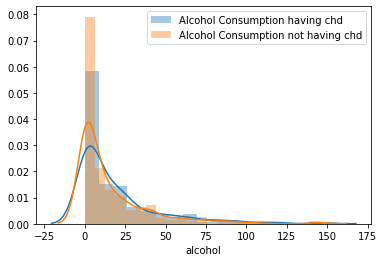

In [24]:
import matplotlib.pyplot as plt
import seaborn as sn
alcohol_chd =heart_df[chd==1]['alcohol']
alcohol_nonchd =heart_df[chd==0]['alcohol']

sn.distplot(alcohol_chd, label= 'Alcohol Consumption having chd')
sn.distplot(alcohol_nonchd, label= 'Alcohol Consumption not having chd');
plt.legend();

### Step 7: Does *age* has any impact on *chd*?

Note: Overlapped distribution plot.

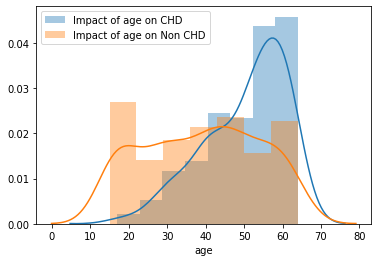

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn

age_chd =heart_df[chd==1]['age']
age_nonchd =heart_df[chd==0]['age']

sn.distplot(age_chd, label= 'Impact of age on CHD')
sn.distplot(age_nonchd, label= 'Impact of age on Non CHD');
plt.legend();

### Step 8: Create a column called "has_famhist" and set to 1 if the person has famhist "Present" or set to 0 if the person has famhist "Absent"

In [27]:
heart_df['has_famhist']=(heart_df['famhist']
                      .map(lambda x: 1 if x=='Present' else 0))

In [28]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 12 columns):
row.names      462 non-null int64
sbp            462 non-null int64
tobacco        462 non-null float64
ldl            462 non-null float64
adiposity      462 non-null float64
famhist        462 non-null object
typea          462 non-null int64
obesity        462 non-null float64
alcohol        462 non-null float64
age            462 non-null int64
chd            462 non-null int64
has_famhist    462 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 43.4+ KB


### Step 9: Are ldl and obesity correlated? Do they have positive or negative correlation?

Note: Draw a scatter plot.

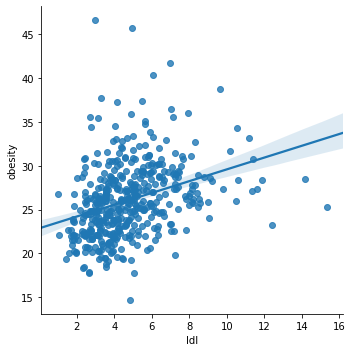

In [29]:
sn.lmplot(data= heart_df, 
          x='ldl',
         y='obesity');

### Step 10: Create a heatmap between the following variables?

- ldl
- obeisity
- tobacco
- age
- sbp
- typea

Infer which two variables are most correlated?

In [37]:
heart_df_v1= heart_df[['ldl',
                    'obesity',
                    'tobacco',
                    'age',
                     'sbp',
                     'typea']];

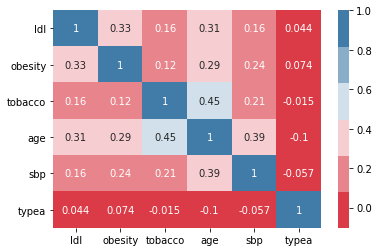

In [38]:
sn.heatmap(heart_df_v1.corr(), 
           annot=True, 
          cmap=sn.diverging_palette(10,240));

### Step 11: What is the range of ldl and sbp for 95% of people suffering from chd?

In [42]:
ldl_chd =heart_df[chd==1]['ldl']
sbp_chd =heart_df[chd==1]['sbp']


In [43]:
from scipy import stats
stats.norm.interval(0.95,ldl_chd.mean(),ldl_chd.std())

(1.1268745781411615, 9.84900042185884)

In [44]:
stats.norm.interval(0.95,sbp_chd.mean(),sbp_chd.std())

(97.3305157486581, 190.1444842513419)

### Step 12: Are the age of some people suffering from chd seem abnormal i.e. very low age?

Note: Find Outliers

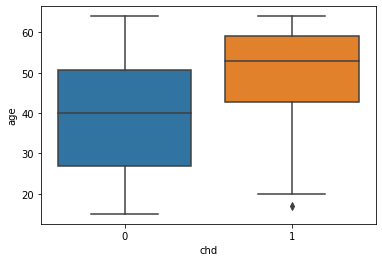

In [39]:
sn.boxplot(data=heart_df,
           x='chd',
           y='age');

### Note:

**Name**: &lt;Fill your Name Here &gt;

After completing the exercises, export the file as html file and store it.

### Meenakshi